## Step 1: Import Libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Seaborn for plotting and styling
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

## Step 2: Load dataset

In [4]:
# Load dataset

from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
boston = load_boston()

dataset = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= boston['feature_names'].tolist() + ['target'])


## Step 3: Exploratory Analysis


In [5]:
#Dimension of the data , a quick eye how the data are
print(dataset.shape)

(506, 14)


In [6]:
####The problem of predicting housing prices is clearly not a classification problem and, therefore, is a regression problem, as the labels (the prices) are continuous numerical data. Hence, for evaluating the model's performance,
#we can consider performance metrics for regression

In [7]:
#Peak of the data
#head of data
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

In [8]:
#Statistical summary of each attribute , count, mean, the min and max values
print(dataset.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [9]:
#The class distribution ,  the number of instances (rows) that belong to each clas#s

print(dataset.groupby('target').size())

target
5.0      2
5.6      1
6.3      1
7.0      2
7.2      3
7.4      1
7.5      1
8.1      1
8.3      2
8.4      2
8.5      2
8.7      1
8.8      2
9.5      1
9.6      1
9.7      1
10.2     3
10.4     2
10.5     2
10.8     1
10.9     2
11.0     1
11.3     1
11.5     1
11.7     2
11.8     2
11.9     2
12.0     1
12.1     1
12.3     1
        ..
35.2     1
35.4     2
36.0     1
36.1     1
36.2     2
36.4     1
36.5     1
37.0     1
37.2     1
37.3     1
37.6     1
37.9     1
38.7     1
39.8     1
41.3     1
41.7     1
42.3     1
42.8     1
43.1     1
43.5     1
43.8     1
44.0     1
44.8     1
45.4     1
46.0     1
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
dtype: int64


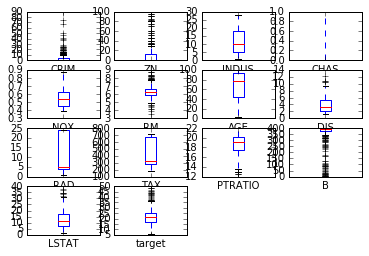

In [10]:
#Univariate plots,plots of each individual variable.#whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

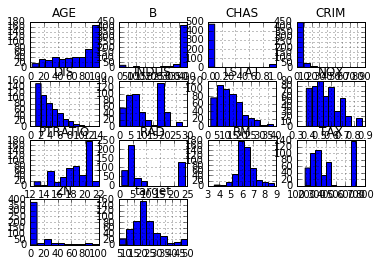

In [11]:
#univariate using histogramms
dataset.hist()
plt.show()

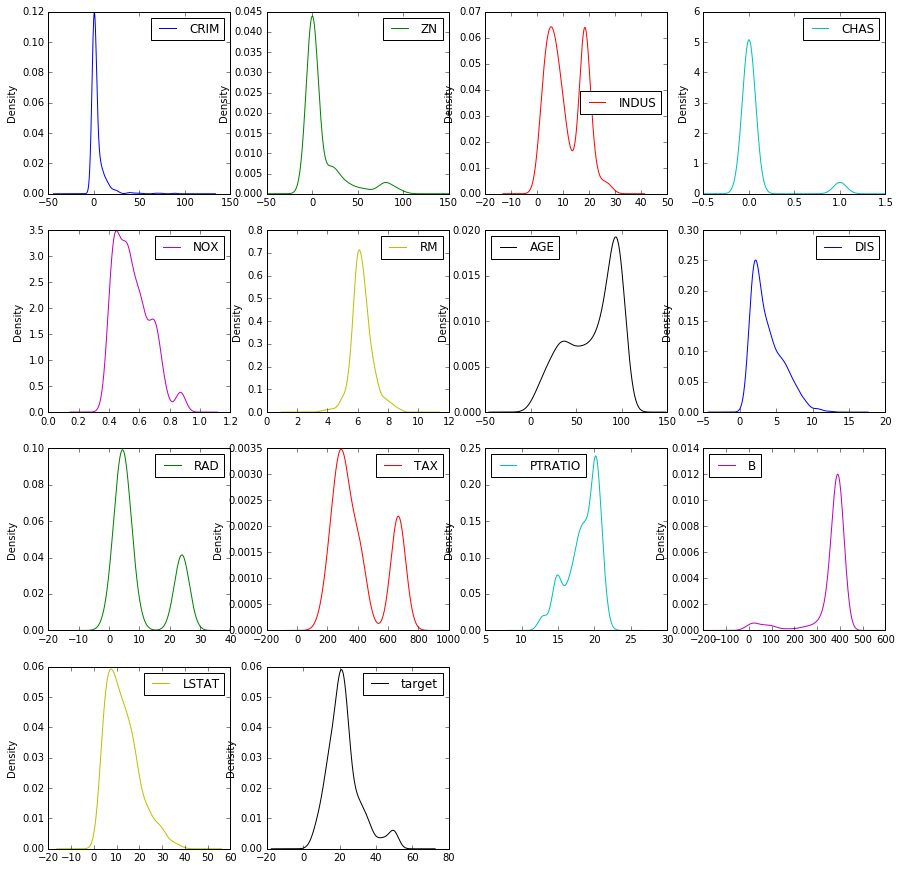

In [12]:
#univariate using density plots
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(15,15))
plt.show()

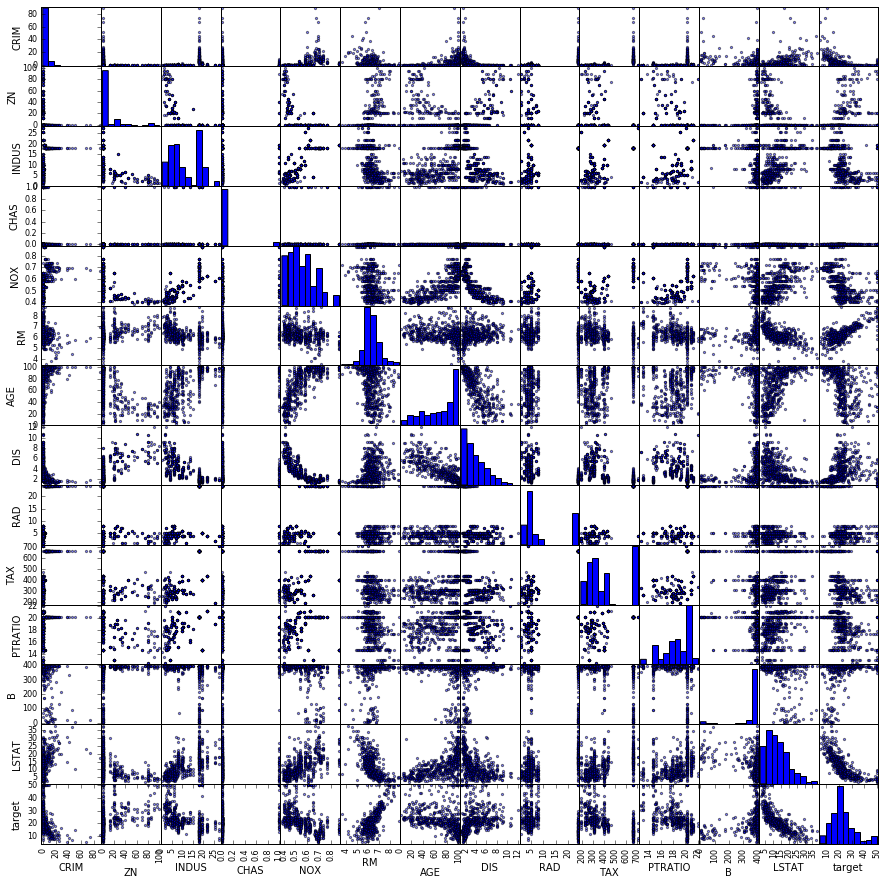

In [13]:
#Multivariate plots to better understand relationships between attributes (scatter plot matrix,
#correlations)

#scatter plot matrix
scatter_matrix(dataset,figsize=(15,15))
plt.show()



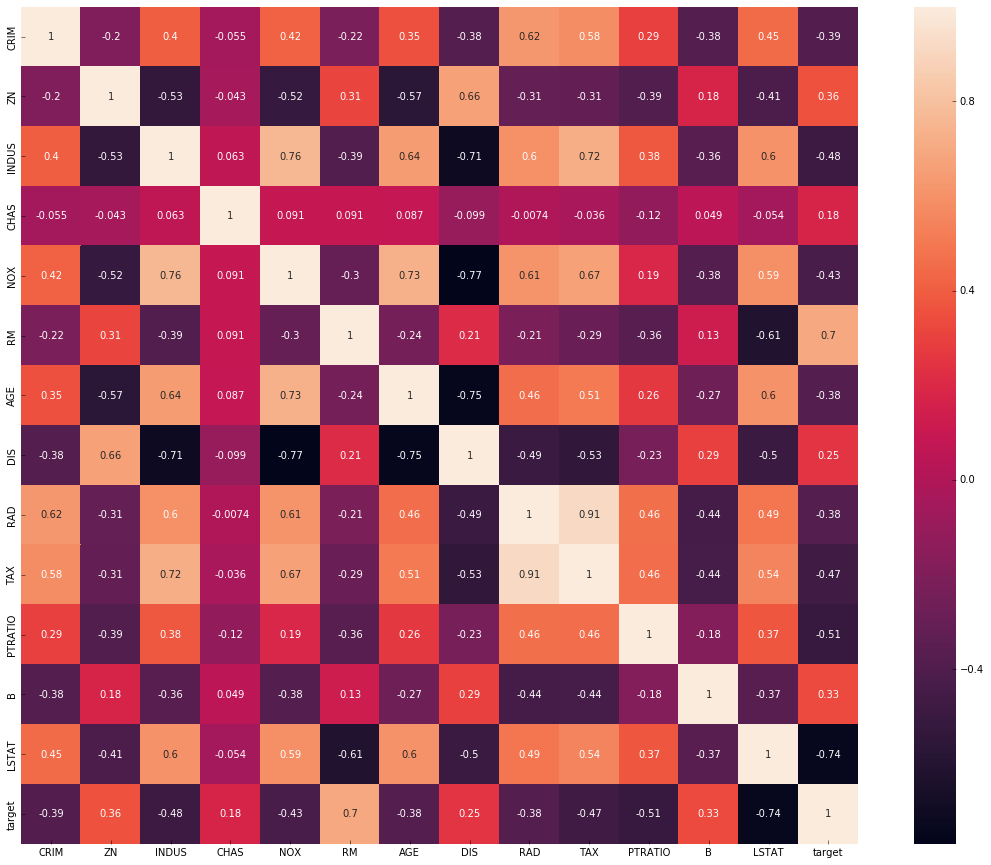

In [14]:
#heatmap-correlation matrix

correlations = dataset.corr()
#sns.heatmap(correlations)
#plt.show(1)
plt.subplots(figsize=(20,15))
sns.heatmap(correlations, square=True,annot=True)
plt.show(1)


## Step 4: Prepare Data


In [15]:
# Rescale data (between 0 and 1)
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = dataset.values
# separate array into input and output components
X = array[:,0:13]
Y = array[:,13]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[  0.000e+00   1.800e-01   6.782e-02   0.000e+00   3.148e-01   5.775e-01
    6.416e-01   2.692e-01   0.000e+00   2.080e-01   2.872e-01   1.000e+00
    8.968e-02]
 [  2.359e-04   0.000e+00   2.423e-01   0.000e+00   1.728e-01   5.480e-01
    7.827e-01   3.490e-01   4.348e-02   1.050e-01   5.532e-01   1.000e+00
    2.045e-01]
 [  2.357e-04   0.000e+00   2.423e-01   0.000e+00   1.728e-01   6.944e-01
    5.994e-01   3.490e-01   4.348e-02   1.050e-01   5.532e-01   9.897e-01
    6.347e-02]
 [  2.928e-04   0.000e+00   6.305e-02   0.000e+00   1.502e-01   6.586e-01
    4.418e-01   4.485e-01   8.696e-02   6.679e-02   6.489e-01   9.943e-01
    3.339e-02]
 [  7.051e-04   0.000e+00   6.305e-02   0.000e+00   1.502e-01   6.871e-01
    5.283e-01   4.485e-01   8.696e-02   6.679e-02   6.489e-01   1.000e+00
    9.934e-02]]


In [16]:
#Stanadarize 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-0.418  0.285 -1.288 -0.273 -0.144  0.414 -0.12   0.14  -0.983 -0.667
  -1.459  0.441 -1.076]
 [-0.415 -0.488 -0.593 -0.273 -0.74   0.194  0.367  0.557 -0.868 -0.987
  -0.303  0.441 -0.492]
 [-0.415 -0.488 -0.593 -0.273 -0.74   1.283 -0.266  0.557 -0.868 -0.987
  -0.303  0.396 -1.209]
 [-0.415 -0.488 -1.307 -0.273 -0.835  1.016 -0.81   1.078 -0.753 -1.106
   0.113  0.416 -1.362]
 [-0.41  -0.488 -1.307 -0.273 -0.835  1.229 -0.511  1.078 -0.753 -1.106
   0.113  0.441 -1.027]]


In [17]:
# Normalise data (length of 1)
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[  1.264e-05   3.600e-02   4.620e-03   0.000e+00   1.076e-03   1.315e-02
    1.304e-01   8.179e-03   2.000e-03   5.919e-01   3.060e-02   7.937e-01
    9.959e-03]
 [  5.785e-05   0.000e+00   1.498e-02   0.000e+00   9.935e-04   1.360e-02
    1.671e-01   1.052e-02   4.237e-03   5.126e-01   3.771e-02   8.408e-01
    1.936e-02]
 [  5.857e-05   0.000e+00   1.517e-02   0.000e+00   1.007e-03   1.542e-02
    1.311e-01   1.066e-02   4.293e-03   5.194e-01   3.820e-02   8.431e-01
    8.650e-03]
 [  7.105e-05   0.000e+00   4.785e-03   0.000e+00   1.005e-03   1.536e-02
    1.005e-01   1.331e-02   6.585e-03   4.873e-01   4.104e-02   8.662e-01
    6.453e-03]
 [  1.506e-04   0.000e+00   4.755e-03   0.000e+00   9.989e-04   1.559e-02
    1.182e-01   1.322e-02   6.543e-03   4.842e-01   4.078e-02   8.656e-01
    1.162e-02]]


## Step 6: Algorithm Selection


In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [20]:
models = []
models.append(('LR',LinearRegression()))
models.append(('RI', Ridge()))
models.append(('LAS',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [21]:
#cross-validation is a method for assessing (and ensuring) that predictive models generalize well to new and unseen data.
#It typically involves multiple rounds of partitioning available data into training and testing sets.
#A common cross validation method is K-fold cross validation, 
#where the data set is divided into k subsets and each subset serves as the testing data set once, 
#resulting in k trials or 'folds'.
#It's particularly useful with grid search, as it ensures that optimal values for parameters 
#are found that avoid underfitting (accurately predict data) and avoid overfitting (the model generalizes well).

##prepare data !!! drop target add it to Y.
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
scoring='neg_mean_squared_error'


results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
##perneis tin apoliti timi

LR: -34.763092 (45.613653)
RI: -34.135235 (45.951208)
LAS: -34.468099 (27.886469)
EN: -31.163471 (22.705972)
KNR: -107.286839 (79.839529)
DTR: -40.563068 (32.061430)
SVR: -91.047824 (71.101574)


In [22]:
#with normalized data
validation_size = 0.20
seed = 7
scoring='neg_mean_squared_error'


results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, normalizedX, Y, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -29.567845 (38.246951)
RI: -63.643530 (48.351411)
LAS: -92.133823 (66.356070)
EN: -90.952901 (65.601469)
KNR: -88.534235 (51.591284)
DTR: -36.285508 (26.049860)
SVR: -80.419534 (67.897674)


In [23]:
#with rescaled data / standar
validation_size = 0.20
seed = 7
scoring='neg_mean_squared_error'


results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, rescaledX, Y, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -34.763092 (45.613653)
RI: -34.610802 (45.458388)
LAS: -37.862851 (40.589106)
EN: -37.298298 (36.084789)
KNR: -28.584596 (25.458626)
DTR: -39.640268 (30.754735)
SVR: -38.586539 (38.008841)


## Step 7: Model Training && STEP 8 Finalise Model
Apply ensembles and improve performance by hyperparameter optimisation.

In [24]:
#improve with 2 different algorithms
##Grid search is an approach to parameter tuning that will methodically build and
#evaluate a model for each combination 
#of algorithm parameters specified in a grid


from sklearn.model_selection import GridSearchCV

alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

model = ElasticNet()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X, Y)
# print(grid)
# summarize the results of the grid search
print(grid.best_score_) #the accuracy score
print(grid.best_estimator_.alpha) ##most acurrate alpha is 1.0



0.387892292478
1.0


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [26]:
###Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution (i.e. uniform) 
#for a fixed number of iterations. 
##A model is constructed and evaluated for each combination of parameters chosen.


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# prepare a uniform distribution to sample for the alpha parameter

param_grid = {'alpha': uniform()}
model =ElasticNet()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

##Algorithm parameter tuning is an important step for improving algorithm performance 
#right before presenting results or preparing a system for production.




0.454584948893
0.343536529704


In [27]:
##With normalized data gridcv
from sklearn.model_selection import GridSearchCV

alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters)
grid.fit(normalizedX, Y)
# print(grid)
# summarize the results of the grid search
print(grid.best_score_) #the accuracy score
print(grid.best_estimator_) ##most acurrate parameters

#fit_intercept = whether to calculate the intercept for this model.
#normalize = This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 
#copy_x= If True, X will be copied; else, it may be overwritten.

-0.439351814398
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [28]:
##With rescaled data
##With normalized data gridcv
from sklearn.model_selection import GridSearchCV

parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

model =KNeighborsRegressor()
grid =GridSearchCV(model, parameters)
grid.fit(rescaledX, Y)
# print(grid)
# summarize the results of the grid search
print(grid.best_score_) #the accuracy score
print(grid.best_estimator_) ##most acurrate parameters are


0.464280265247
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')
